**In this part of the analysis, first we will present a story outline. And then we will follow the outline and explore the key points. We will also explain the rationale for choosing a particular visualization over others in analyzing the topics and the key observations that can be made from each visual.**

In [1]:
#importing libraries
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms, pyplot as plt
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

**9.Note: Since the Customers and the Subscribers are two separate groups, it is important to analyze the characteristics of both the groups before making any recommendation so that no vital characteristics is missed that might be crucial for the campaign.**

In [2]:
# recall the stored dataset for analysis
%store -r df

In [3]:
#Colors that will be used throughout the analysis- taken from Ref 5 accessed during Dec-2018
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

### 1.Story Outline

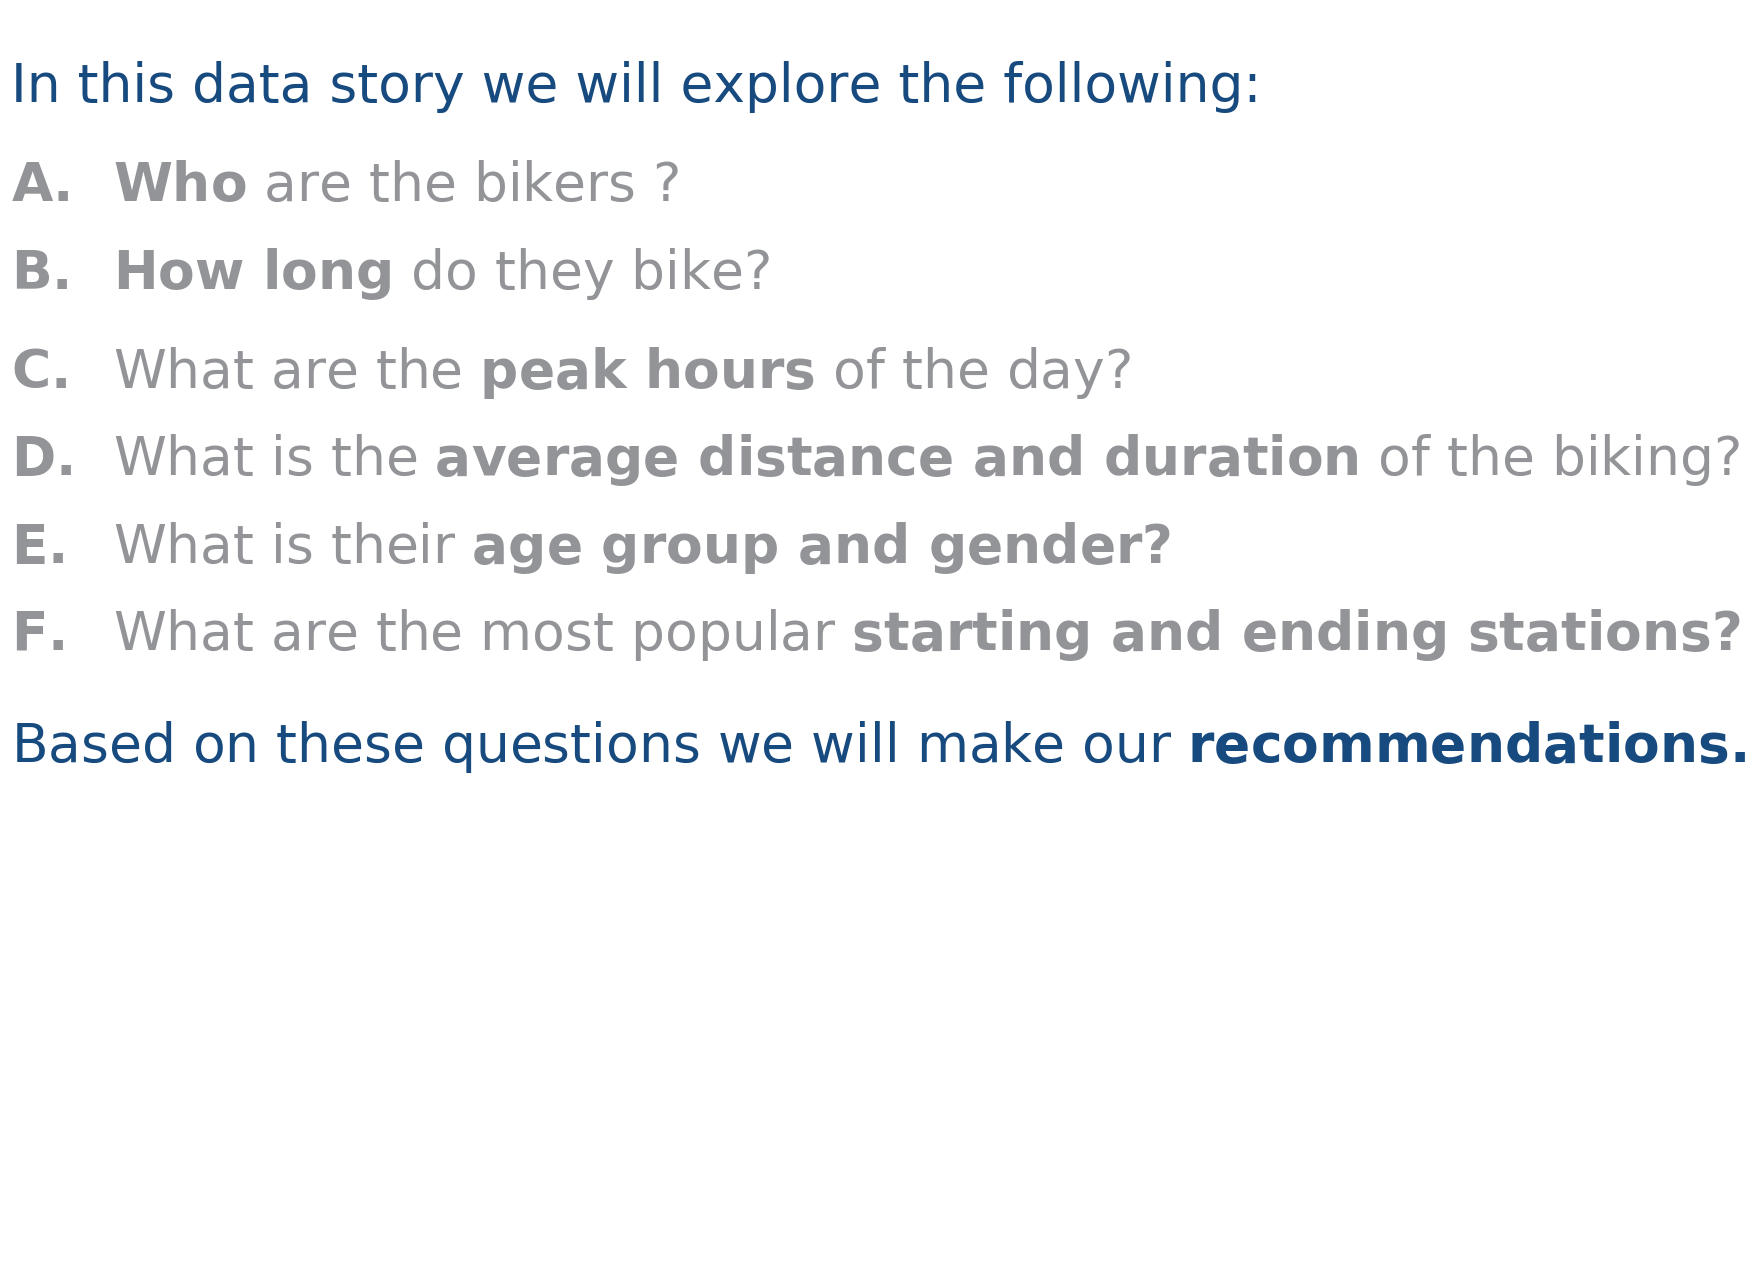

In [4]:
# create new figure
plt.figure(figsize=(15, 15), # width, height in inches
           dpi=110)             # resolution of the figure

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines 
plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)

#adding text- the outline of this datastory
plt.text(-0.14, 0.93, 'In this data story we will explore the following:',fontsize=35, color=BLUE1)
plt.text(-0.14, 0.85, '$\\bf{A.}$',fontsize=35, color=GRAY7)
plt.text(-0.06, 0.85, '$\\bf{Who}$'' are the bikers ?',fontsize=35, color=GRAY7)

plt.text(-0.14, 0.78, '$\\bf{B.}$',fontsize=35, color=GRAY7)
plt.text(-0.06, 0.78, '$\\bf{How\ long}$'' do they bike?',fontsize=35, color=GRAY7)

plt.text(-0.14, 0.70, '$\\bf{C.}$',fontsize=35, color=GRAY7)
plt.text(-0.06, 0.70, 'What are the ''$\\bf{ peak\ hours}$'' of the day?',fontsize=35, color=GRAY7)

plt.text(-0.14, 0.63, '$\\bf{D.}$',fontsize=35, color=GRAY7)
plt.text(-0.06, 0.63, 'What is the ' '$\\bf{ average\ distance\ and\ duration}$'' of the biking?',fontsize=35, color=GRAY7)

plt.text(-0.14, 0.56, '$\\bf{E.}$',fontsize=35, color=GRAY7)
plt.text(-0.06, 0.56, 'What is their ' '$\\bf{age\ group\ and\ gender ?}$',fontsize=35, color=GRAY7)

plt.text(-0.14, 0.49, '$\\bf{F.}$',fontsize=35, color=GRAY7)
plt.text(-0.06, 0.49, 'What are the most popular ' '$\\bf{starting\ and\ ending\ stations?}$',fontsize=35, color=GRAY7)


plt.text(-0.14, 0.40, 'Based on these questions we will make our ' '$\\bf{recommendations.}$',fontsize=35, color=BLUE1)

#show plot
plt.show()

**For the rest of part-1, we will focus on question A- Who are the bikers, B-How long do they bike, and C- What are the peak hours of the day. Question D and E- that variables related to distance and duration of biking, age group, and gender will be analyzed in part 2. Finally, in part 3, we will observe the starting and ending stations and summarize our observations.**


### 2) Who Are the bikers?

In this part of the analysis, a general overview of the bikers will be provided using some descriptive statistics, without any explanatory visuals. We will mainly focus on-

I. The percentage of Subscribers and Customers among the bikers to see which user type dominates

II. What is the ratio of male and female to see why it is the males who are more in numbers among the victims

III. What is the dominant age group and that can give us an idea of why it is mainly the young male above 20 years old are the victims.


In [5]:
#shape of the dataframe- gives number of rows and columns
df.shape

(1651156, 26)

In [6]:
#Show the first three rows 
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,Wed,2018,1,22,19,1254.733333,Weekday,32,Winter,2.488001
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,Wed,2018,1,14,10,1192.933333,Weekday,22,Winter,2.972357
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,Wed,2018,1,19,6,666.100000,Weekday,27,Winter,2.443038


In [7]:
# Number of Unique starting station
df.start_station_id.nunique()

327

In [8]:
# Number of Unique ending station
df.end_station_id.nunique()

327

In [9]:
# Number of Unique bike id 
df.bike_id.nunique()

3933

**2-A. What is the percentage of Subscribers and Customers among the bikers?**

In [10]:
#find the percentage of subscribers and customers
user_percentage =  df['user_type'].value_counts()/df.shape[0]*100
user_percentage = user_percentage.rename_axis('user_type').reset_index(name='percentage')
user_percentage 

,user_type,percentage
0,Subscriber,88.611918
1,Customer,11.388082


So, the number of Subscribers are almost 8 times higher in the bay area. Apparently, the large majority of people like to buy Subscriptions.

**2-B.Gender distribution**

In [11]:
#find the percentage of gender distribution among the bikers
df_gender = df['member_gender'].value_counts()/df.shape[0]*100
df_gender = df_gender.rename_axis('user_gender').reset_index(name='percentage')
df_gender 

,user_gender,percentage
0,Male,73.535995
1,Female,24.922115
2,Other,1.541889


The number of Male bikers is three times larger than the Female bikers. Only handful of people are from 'Other' gender which can be due to the fact that they choose not to identify their gender or apart from the Male and Female, the gender is categorized as "Other" where the users provide their information. 

**2-C. Age distribution**

In [12]:
#Finding the minimum and the maximum of age
df['age'].min(), df['age'].max() 

(18, 137)

The minimum age is 18 years old. However, the maximum age is 137 which can not be a real case. We can conclude that the age data is erroneous. One way to deal with it is to get rid of the age data altogether. However, we are interested to analyze the age of the bikers to run a targetted campaign. Hence, we would only focus on the dominant age groups, and the outliers will be discarded from our analysis which will be a way out in dealing with the erroneous data.

In [13]:
# Calculaitng 80% percentile
ninetynine_percentile_age = np.percentile(df.age, 80)
ninetynine_percentile_age

43.0

We can see from the percentile information that, 80% of the people are 43 years old or younger. 

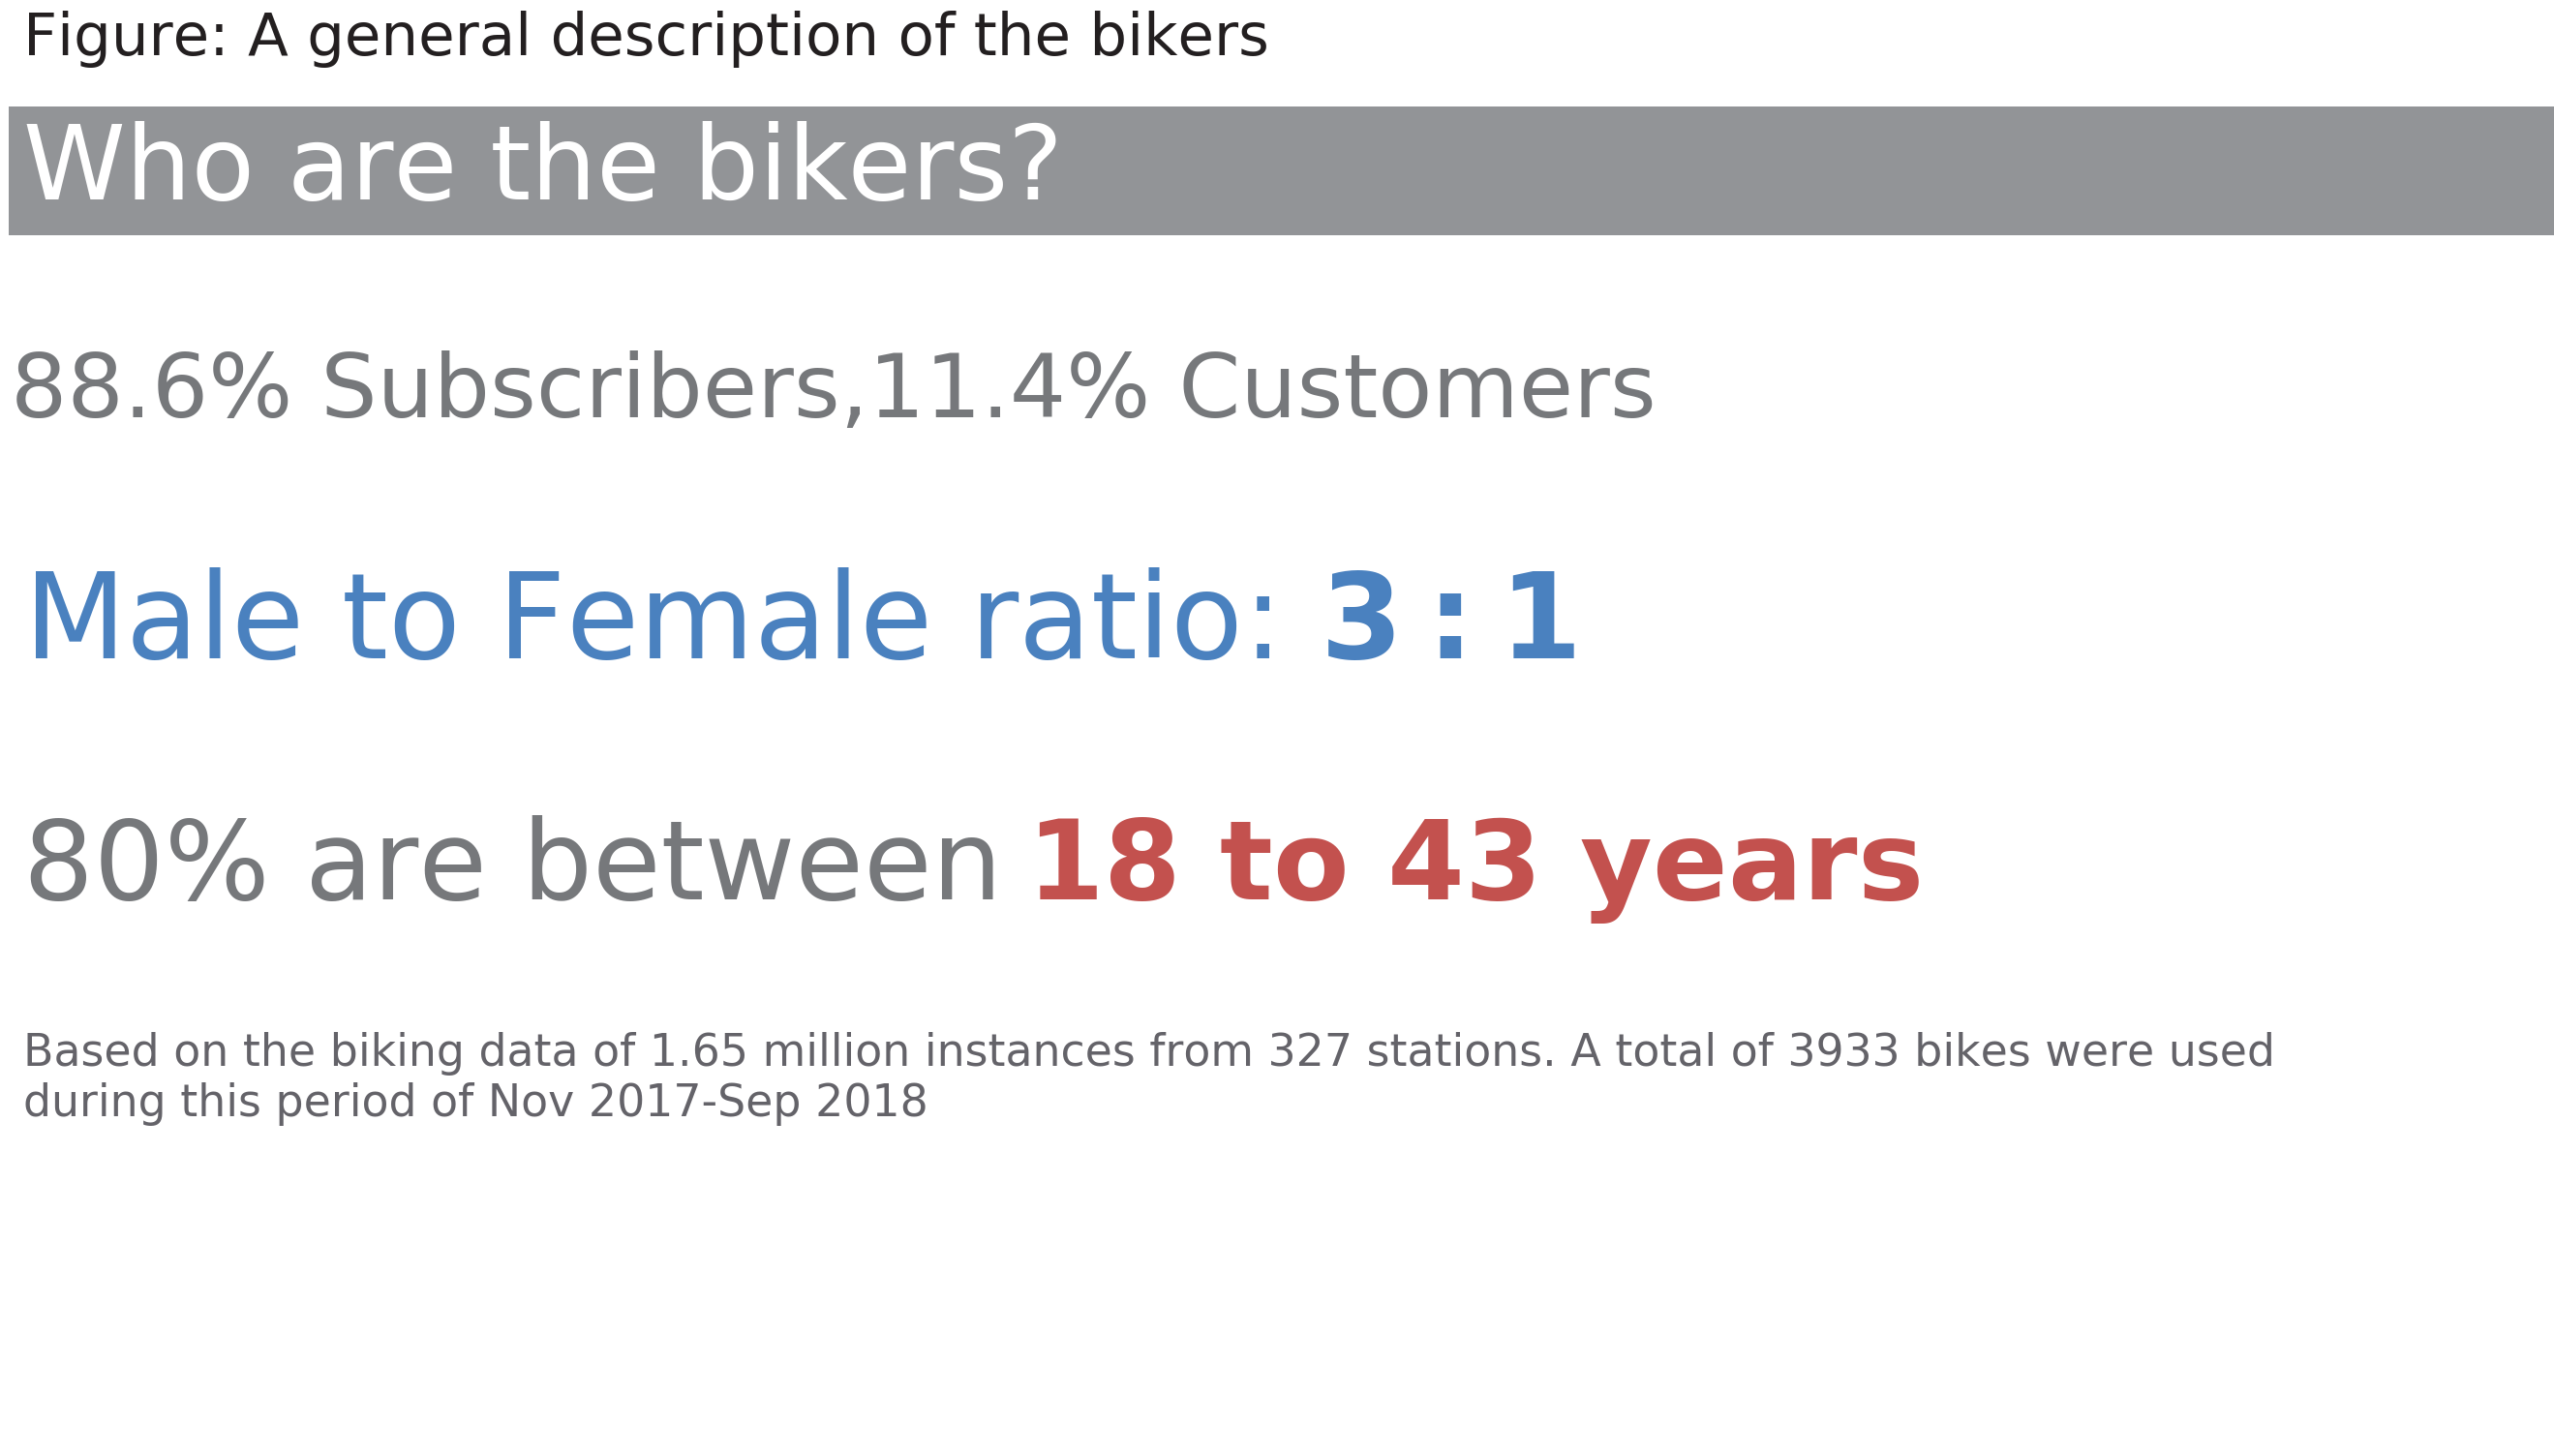

In [14]:
# create new figure
plt.figure(figsize=(15, 15), # width, height in inches
           dpi=110)             # resolution of the figure

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines 
plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)

# title the plot
plt.text(-0.14, 1.03,'Who are the bikers?'+' '*45,fontsize=70,color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7, 'pad': 10, 'edgecolor': 'none'})

# footnote with the data source
plt.text(-0.14, 0.27,

         'Based on the biking data of 1.65 million instances from 327 stations. A total of 3933 bikes were used'
         '\nduring this period of Nov 2017-Sep 2018', fontsize=30, color=GRAY4)

# add note to the plot
plt.text(-0.15, 0.85, '88.6% Subscribers,11.4% Customers',fontsize=60, color=GRAY5)
plt.text(-0.14, 0.65, 'Male to Female ratio: $\\bf{3:1}$',fontsize=80, color=BLUE2)
plt.text(-0.14, 0.45, '80% are between',fontsize=75, color=GRAY5)
plt.text(0.67, 0.45, '$\\bf{18\ to\ 43\ years}$',fontsize=75, color=RED1)
plt.text(-0.14, 1.15, "Figure: A general description of the bikers",fontsize=40, color=GRAY1)
plt.show()

### 3. When do they bike?



To explore this question we will find- what are the peak hours of the day on average from the number of people biking per hour. We will also find if there is a difference in peak hours during the weekdays and the weekend. We will find what are the busiest days of the week, and what is the biking pattern throughout various seasons of the year. We will also explore if there is any significant difference in biking pattern for the Customers and the Subscribers. 

**Visual**: In answering the questions we will mostly use line plots and bar plots. Because line plots are the best when it comes to showing time series data to explain the trend over a period. As for the bar charts, it is very useful about categorical data and can be interpreted easily.


**3-A What is the peak hours for the bikers?**

In [15]:
#new dataframe declaration for Customers and Subscribers
df_subscriber = df.query('user_type == "Subscriber"')
df_customer = df.query('user_type == "Customer"')

In [16]:
#finding Customers and Subscribers per hour 
df_sub_per_hour = df_subscriber.groupby(['start_hour']).size().reset_index(name='number_sub')
df_cus_per_hour = df_customer.groupby(['start_hour']).size().reset_index(name='number_cus')

In [17]:
#Show Customer per hour
df_cus_per_hour.head(3)

,start_hour,number_cus
0,0,1067
1,1,559
2,2,393


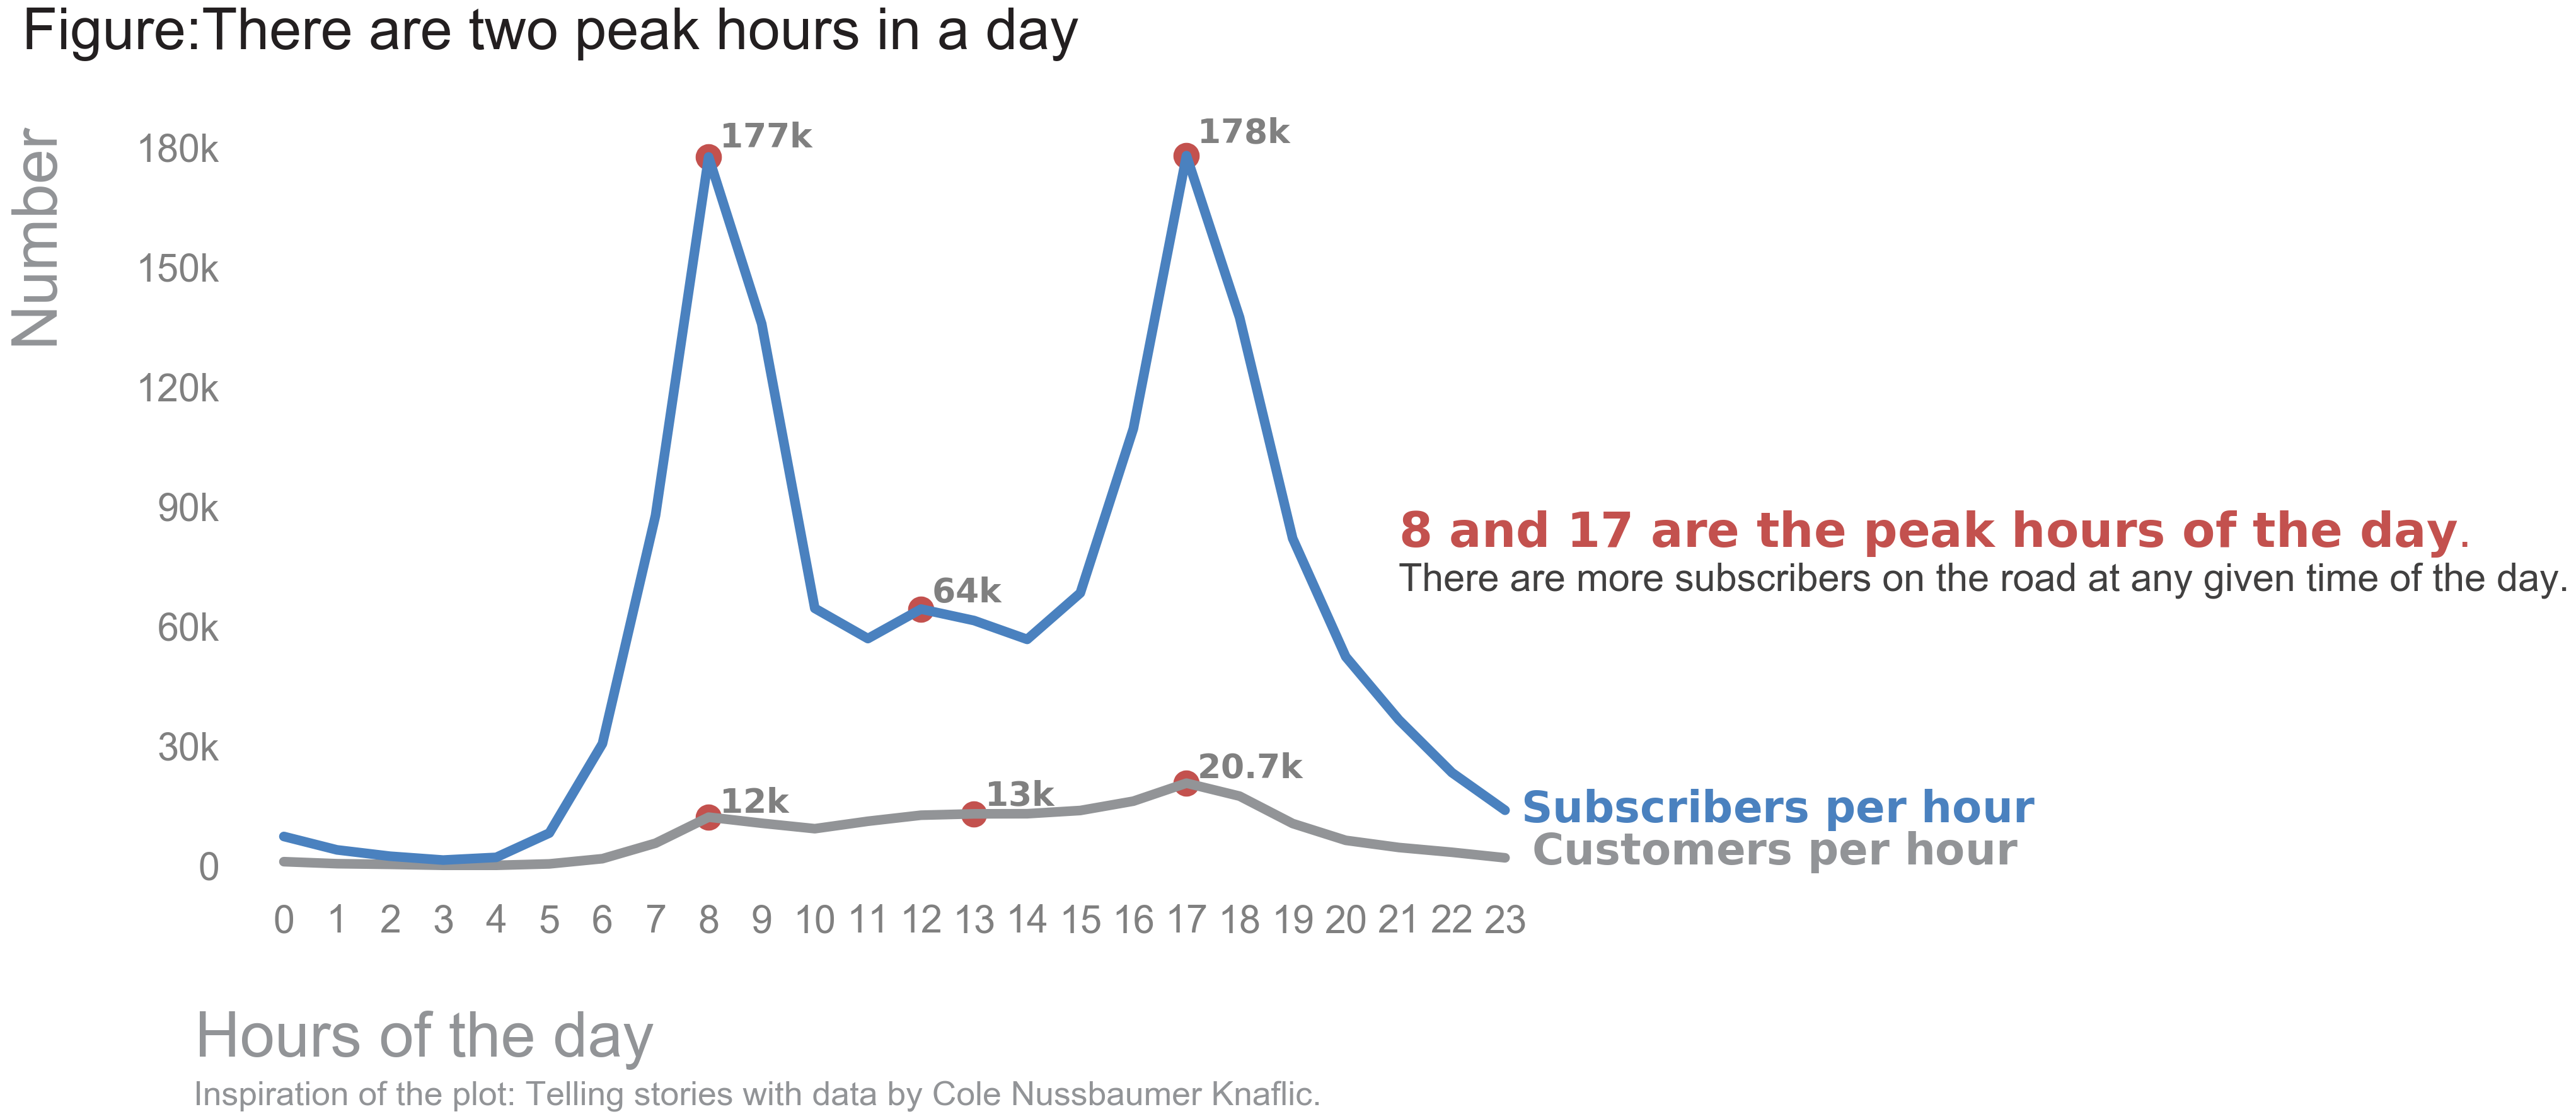

In [18]:
#Plotting customer per hour
plt.figure(figsize = [25, 15], dpi=110)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.plot('start_hour','number_cus', data=df_cus_per_hour, color = GRAY7, linewidth=10)

plt.plot('start_hour','number_sub', data=df_sub_per_hour , color=BLUE2, linewidth=10)

#plt.axvline(x=8, ymax=1, color=GRAY2, linewidth=2)
#plt.axvline(x=17,ymax=1, color=GRAY2, linewidth=2)
#plt.axvline(x=13,ymin= 0.1, ymax=0.2, color=GRAY7, linewidth=5)

#plotting text
plt.text(23.3,11000, '$\\bf{Subscribers\ per\ hour}$', fontsize='45', color=BLUE2)
plt.text(23.5,400, '$\\bf{Customers\ per\ hour}$', fontsize='45', color=GRAY7)

#Plotting the important values as scatterpoint to indicate importance
plt.scatter(8, df_sub_per_hour['number_sub'][8], s=150, color=RED1, clip_on=False, linewidth=15)
plt.scatter(12, df_sub_per_hour['number_sub'][12], s=150, color=RED1, clip_on=False, linewidth=15)
plt.scatter(17, df_sub_per_hour['number_sub'][17], s=150, color=RED1, clip_on=False, linewidth=15)

#text comment
plt.text(8.2,180e3, '$\\bf{177k}$', fontsize='35', color='grey')
plt.text(12.2,66e3, '$\\bf{64k}$', fontsize='35', color='grey')
plt.text(17.2,181e3, '$\\bf{178k}$', fontsize='35', color='grey')

#Plotting the important values as scatterpoint to indicate importance
plt.scatter(8, df_cus_per_hour['number_cus'][8], s=150, color=RED1, clip_on=False, linewidth=15)
plt.scatter(13, df_cus_per_hour['number_cus'][13], s=150, color=RED1, clip_on=False, linewidth=15)
plt.scatter(17, df_cus_per_hour['number_cus'][17], s=150, color=RED1, clip_on=False, linewidth=15)

# adding text levels
plt.text(8.2,13.3e3, '$\\bf{12k}$', fontsize='35', color='grey')
plt.text(13.2,15e3, '$\\bf{13k}$', fontsize='35', color='grey')
plt.text(17.2,22e3, '$\\bf{20.7k}$', fontsize='35', color='grey')

#plotting text
plt.text(21, 80e3, '$\\bf{8\ and\ 17\ are\ the\ peak\ hours\ of\ the\ day}$.', fontsize=50, color=RED1, linespacing=1.4)
plt.text(21, 69e3,'There are more subscribers on the road at any given time of the day.', fontsize=40, color=GRAY2, linespacing=1.4)

#plot tile and labels
plt.title('Figure:There are two peak hours in a day \n',fontsize=60, color=GRAY1, x=0.25,  y=1.0)
plt.xlabel("\nHours of the day",fontsize=65, color=GRAY7, x=0.15)
plt.ylabel("Number\n",fontsize=65, color=GRAY7, x=0, y=0.85)

# adding text at the bottom to mention source
plt.text(-1.7, -60e3, 'Inspiration of the plot: Telling stories with data by Cole Nussbaumer Knaflic.', fontsize=35, color=GRAY7,linespacing=1.4)

# x and y ticks
plt.xticks(np.arange(0, 24, 1.0),fontsize=40, color ='grey')
plt.yticks(np.arange(0, max(df_subscriber['start_hour'].value_counts())+10000, 10000.0),fontsize=40, color ='grey')

# yaxis values
plt.yticks([0, 30000, 60000, 90000,  120000, 150000, 180000], [0,'30k', '60k', '90k', '120k',  '150k', '180k'])

#remove the border from bottom and left
sns.despine(bottom=True, left=True)

#show plot
plt.show()

### Observations


**1.** There is a higher number of Subscribers on the street at any given time of the day. The number of Subscribers on average remains steady in the morning, and in the afternoon but the number of Customers increases significantly in the afternoon.


**2.** The peak hours also coincides with the rush hours when people go to the office in the mornings and comes back home after the office in the afternoon.


**3.** The peaks in the middle coincide with the lunch hours. 


**4.** Most of the bikers are of age 18-43, and these are the people who are mostly students and office goers. However, in order to make inference whether this is due to the office goers going to work and students going to the schools, we need more specific data about their profession, travelling and lunchtime of the individuals- which we do not have at this point.



**3-B Do the peak hours vary during the weekdays and the weekends?**

In [19]:
#new dataframe for weekdays and weekend
df_weekend = df.groupby(['day_type'])['start_hour'].value_counts().sort_index().reset_index(name='number')
df_weekdays = df.query('day_type == "Weekday"')['start_hour'].value_counts().sort_index()

In [20]:
#number of bikers per hour in weekdays and weekends
df_weekday = df.groupby(['day_type'])['start_hour'].value_counts().sort_index().reset_index(name='number')[0:24]
df_weekend = df.groupby(['day_type'])['start_hour'].value_counts().sort_index().reset_index(name='number')[24:48]

#Show the max number of bikers during a weekend
df_weekend.number.max()

23856

In [21]:
# Show Number of bikers per hour during weekend
df_weekend.head(3)

,day_type,start_hour,number
24,Weekend,0,3677
25,Weekend,1,2222
26,Weekend,2,1333


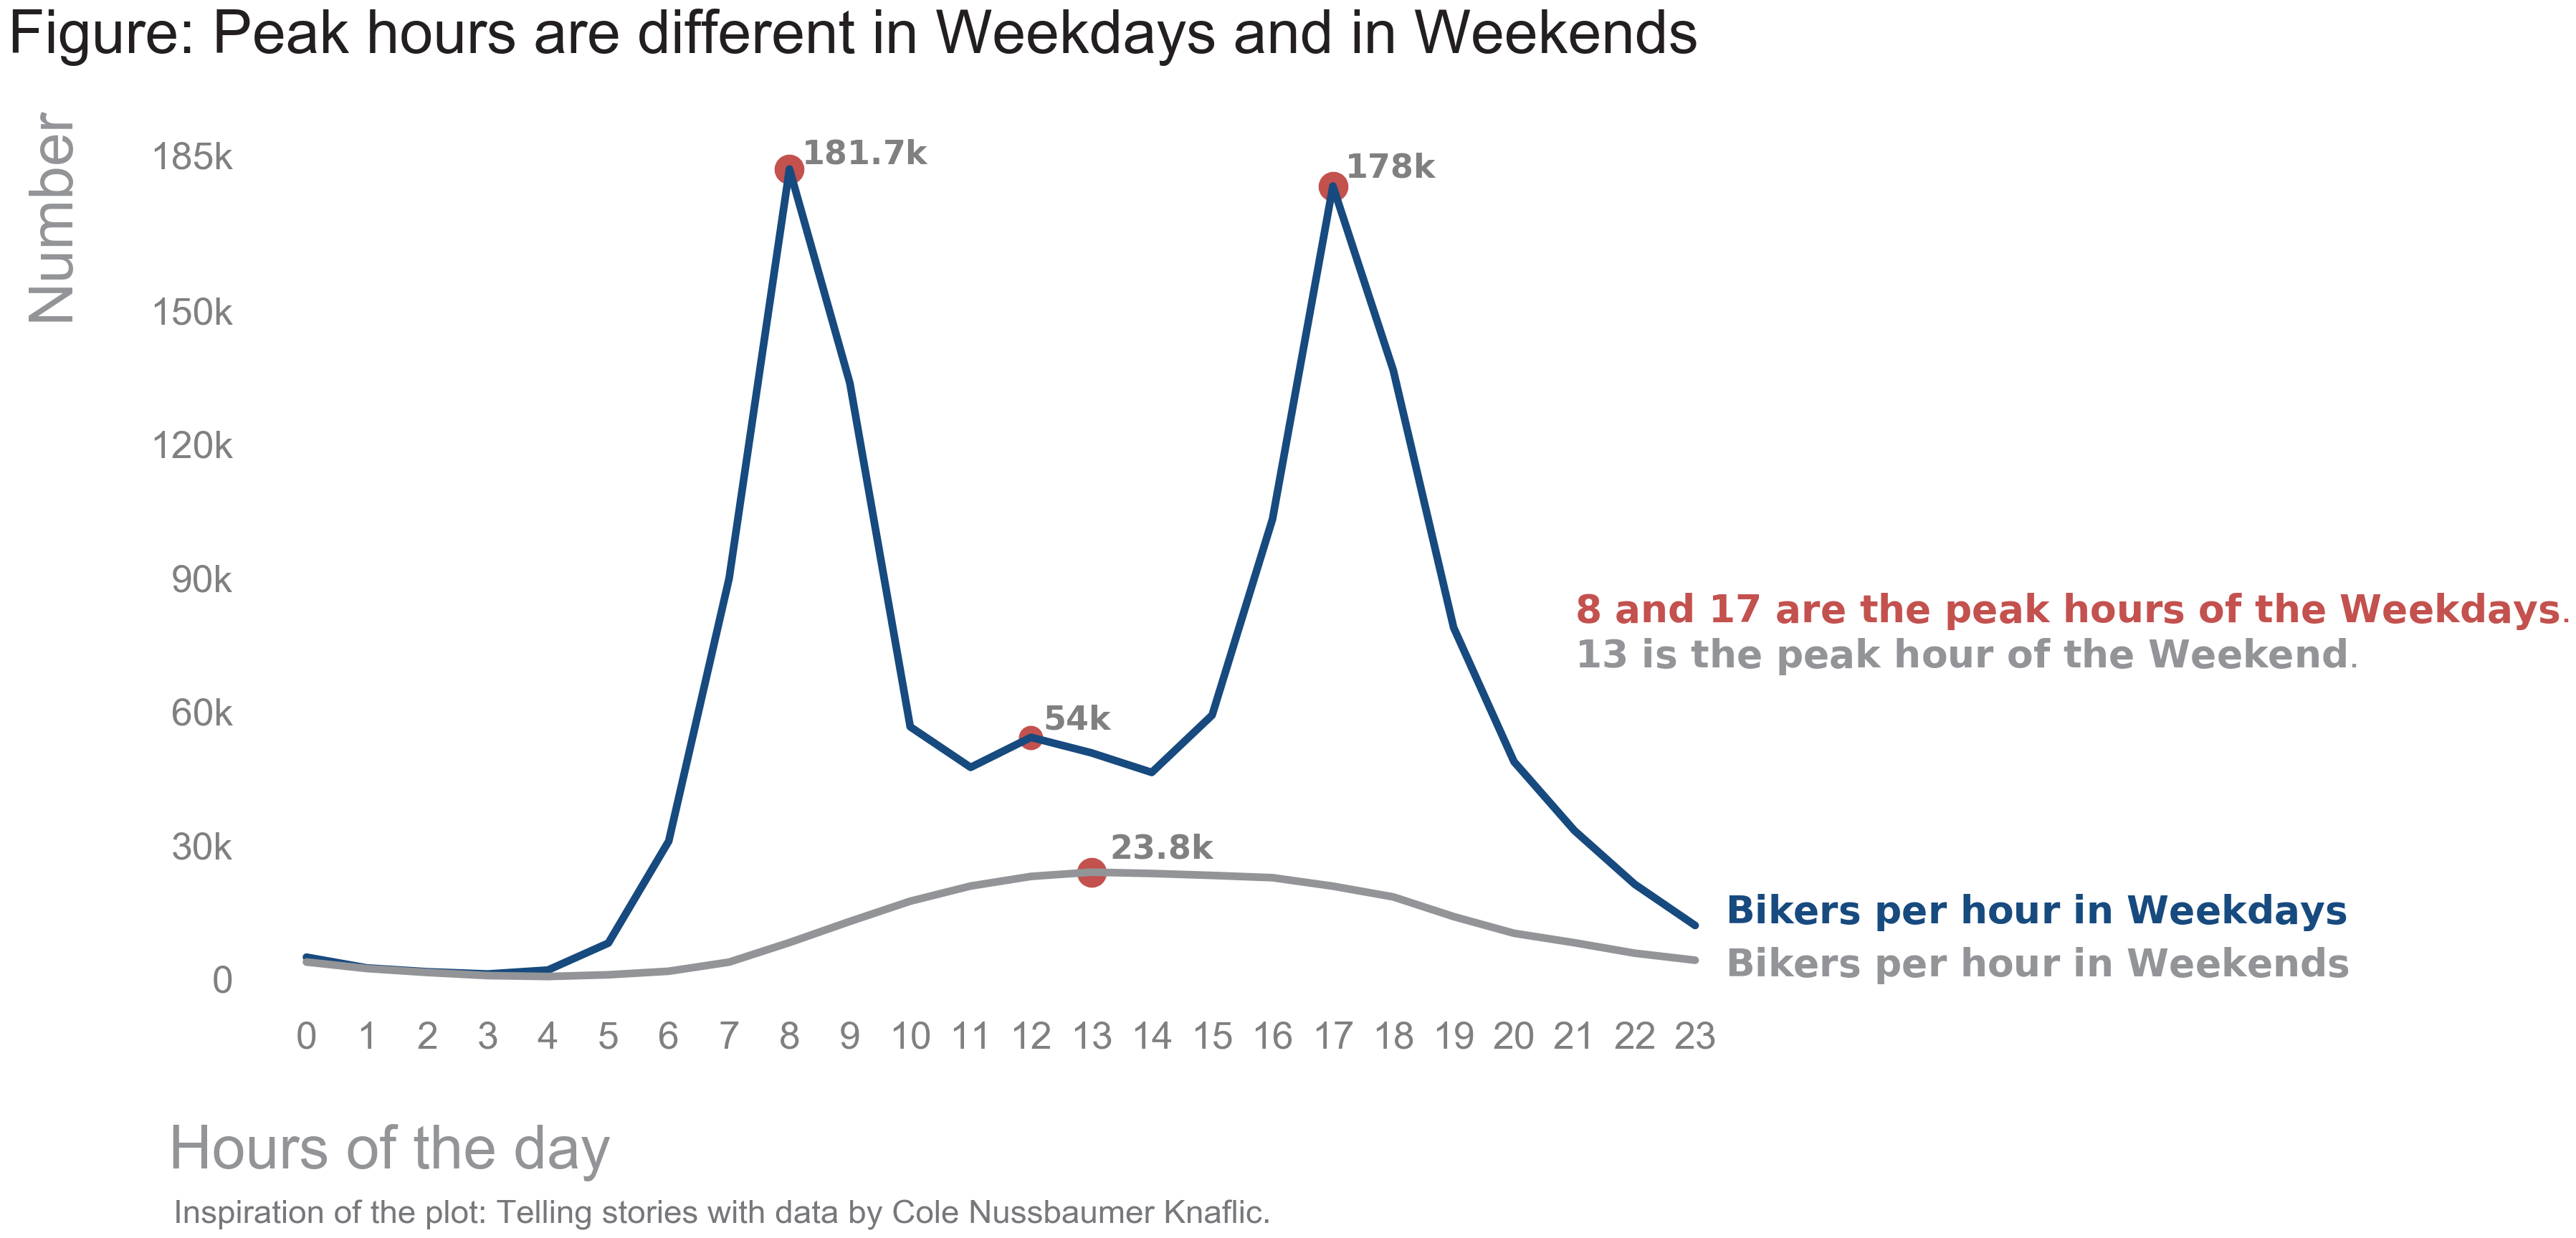

In [22]:
#plot the number of bikers per hour during weekend and weekdays
plt.figure(figsize = [25, 15], dpi=110)
sns.set_style("whitegrid", {'axes.grid' : False})
color = sns.color_palette()
base_color = sns.color_palette()[0]
plt.plot('start_hour','number', data=df_weekday, color = BLUE1, linewidth=7)
plt.plot('start_hour','number', data=df_weekend , color=GRAY7, linewidth=7)

#plot data lebels
plt.text(23.5,12500, '$\\bf{Bikers\ per\ hour\ in \ Weekdays}$', fontsize='35', color=BLUE1)
plt.text(23.5,500, '$\\bf{Bikers\ per\ hour\ in \ Weekends}$', fontsize='35', color=GRAY7)


#Show the peak values using scatter plot
plt.scatter(8, df_weekday['number'][8], s=150, color=RED1, clip_on=False, linewidth=15)
plt.scatter(17, df_weekday['number'][17], s=150, color=RED1, clip_on=False, linewidth=15)
plt.scatter(12, df_weekday['number'][12], s=150, color=RED1, clip_on=False, linewidth=10)
plt.scatter(13, df_weekend['number'][37], s=150, color=RED1, clip_on=False, linewidth=15)



#plot text to show the peak values 
plt.text(8.2,183e3, '$\\bf{181.7k}$', fontsize='30', color='grey')
plt.text(12.2,56e3, '$\\bf{54k}$', fontsize='30', color='grey')
plt.text(17.2,180e3, '$\\bf{178k}$', fontsize='30', color='grey')


plt.text(13.3,27e3, '$\\bf{23.8k}$', fontsize='30', color='grey')

#add text comments
plt.text(21, 80e3,
         '$\\bf{8\ and\ 17\ are\ the\ peak\ hours\ of\ the\ Weekdays}$.', fontsize=35, color=RED1, linespacing=1.4)
plt.text(21, 70e3,
         '$\\bf{13\ is\ the\ peak\ hour\ of\ the\ Weekend}$.', fontsize=35, color=GRAY7, linespacing=1.4)

plt.text(-2.2, -55e3, 'Inspiration of the plot: Telling stories with data by Cole Nussbaumer Knaflic.', fontsize=30, color=GRAY5,linespacing=1.4)


#plot title, x and y axis lables
plt.title('Figure: Peak hours are different in Weekdays and in Weekends \n',fontsize=55,loc="left", color=GRAY1, x=-0.15, y=1)
plt.xlabel("\nHours of the day",fontsize=55, color=GRAY7, x=0.1)
plt.ylabel("Number\n",fontsize=55, color=GRAY7, x=0, y=0.9)
plt.xticks(np.arange(0, 24, 1.0),fontsize=35, color ='grey')
plt.yticks(np.arange(0, max(df_subscriber['start_hour'].value_counts())+10000, 10000.0),fontsize=35, color ='grey')
plt.yticks([0, 30000, 60000, 90000,  120000, 150000, 185000], [0,'30k', '60k', '90k', '120k',  '150k', '185k'])

#remove bottom and left borders
sns.despine(bottom=True, left=True)
#show plot
plt.show()

### Observations


**1.** During the weekdays the peak hours are 8:00 in the morning and 17:00 in the afternoon which is same as the average (this is expected as there are more weekdays and that's why the average resambles the weekdays). Also, the small peak during the 12:00 is there during the weekdays as have seen before.


**2.** The bikers are relunctant to go out with bike during the weekends in the early part of the day, and as the day progress they come out more in number and peak during the middle of the days.

**3.** Roads are much busy during the weekdays with the presenance of a larger biking populations compared to the weekends as there are more bikers on the roads.

**4.** It would be interesting to see the impact of temperature and rain, holiday, special events like sports of festivales on the biking pattern. However, this is beyond the scope of this analysis as we do not have weather data or the yearly event calender of the place.

**3-C Which one is the busiest day(s) of the week?**

In [23]:
# average percentage of journey per day- considering all the journeys as 100 percent
journey_per_day = df['day'].value_counts()/df['day'].value_counts().sum()*100
journey_per_day

Wed    17.618020
Tue    17.581682
Thu    16.886896
Mon    15.887778
Fri    15.661936
Sat     8.701479
Sun     7.662208
Name: day, dtype: float64

In [24]:
# setting new index for the day
new_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [25]:
#reindexing the journey as per the desired index- Monday as the beginning of the week and Sunday as the end
journey_per_day = journey_per_day.reindex(new_index)
journey_per_day = journey_per_day.rename_axis('day').reset_index(name='percentage')
journey_per_day

,day,percentage
0,Mon,15.887778
1,Tue,17.581682
2,Wed,17.618020
3,Thu,16.886896
4,Fri,15.661936
5,Sat,8.701479
6,Sun,7.662208


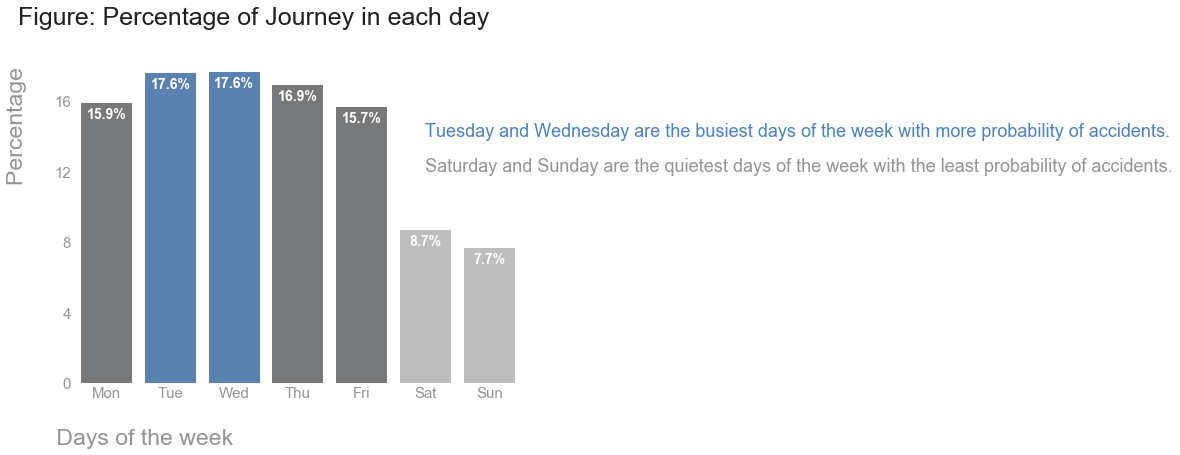

In [26]:
clrs = [GRAY5, BLUE2, BLUE2, GRAY5, GRAY5, GRAY9, GRAY9]

plt.figure(figsize = [8, 6])
ax = sns.barplot(x=journey_per_day.day, y=journey_per_day['percentage'], palette=clrs)

y_data = pd.Series(journey_per_day['percentage'])
x_labels = journey_per_day['day']
plt.yticks(np.arange(0, 20, 4.0), fontsize=15,color=GRAY7)
plt.xticks(fontsize=15,color=GRAY7)

plt.xlabel(" \n Days of the week",fontsize=23,color=GRAY7, x=0.15)
plt.ylabel("Percentage \n",fontsize=23,color=GRAY7, y=0.8)
plt.title('Figure: Percentage of Journey in each day\n',fontsize=25, color=GRAY1, x=0.4)

plt.text(5, 14,'Tuesday and Wednesday are the busiest days of the week with more probability of accidents.', fontsize=18, color=BLUE2, linespacing=1.4)
plt.text(5, 12,'Saturday and Sunday are the quietest days of the week with the least probability of accidents.', fontsize=18, color=GRAY7, linespacing=1.4)

# gets the value to annotate
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -18 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.1f}%".format(y_value) # Use Y value as label and format number with one decimal place 

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=14, color= 'white', fontweight='bold')
    sns.despine(bottom=True, left=True)
    
   

### Observations


**1.** The day of the week has been plotted in the bar chart (an alternative could be line chart as we are plotting the days of the week which is also a time series. However, the days here have been treated as a categorical variable. The order of the days have been maintained.)


**2.** Bikers are higher in number at the middle of the week- in Tuesday and Wednesday. Least in number during the weekends which also coincides with the number of office goers- offices are closed during the weekend. 

In [27]:
#Declaring index for the Month- Starting from nov 2017 to Ot 2018
new_index_month = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

In [28]:
#percerntage of average journey per month - considering all the journeys as 100%
journey_per_month = df['month'].value_counts()/df['month'].value_counts().sum()*100
journey_per_month

Oct    11.597027
Jul    11.125175
Jun    10.986545
Aug    10.803037
Sep    10.584584
May    10.136898
Apr     7.376105
Mar     6.198506
Feb     5.973149
Jan     5.266795
Nov     5.213923
Dec     4.738256
Name: month, dtype: float64

In [29]:
# reindexing the month as per the new index
journey_per_month = journey_per_month.reindex(new_index_month)
journey_per_month = journey_per_month.rename_axis('Month').reset_index(name='percentage')
journey_per_month

,Month,percentage
0,Nov,5.213923
1,Dec,4.738256
2,Jan,5.266795
3,Feb,5.973149
4,Mar,6.198506
5,Apr,7.376105
6,May,10.136898
7,Jun,10.986545
8,Jul,11.125175
9,Aug,10.803037


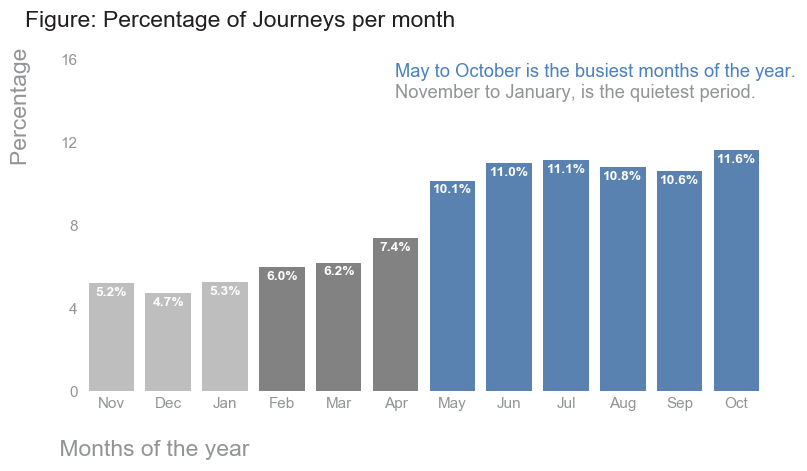

In [30]:
#delcaring clrs for assigning colors to the barplot bars
clrs = [GRAY9, GRAY9, GRAY9,GRAY6, GRAY6,GRAY6,BLUE2,BLUE2,BLUE2,BLUE2,BLUE2,BLUE2]

#figure size and barplot
plt.figure(figsize = [8, 4], dpi=110)
ax = sns.barplot(x=journey_per_month['Month'], y=journey_per_month['percentage'], palette=clrs)

y_data = pd.Series(journey_per_month['percentage'])
x_labels = journey_per_month['Month']
plt.yticks(np.arange(0, 20, 4.0), fontsize=10,color=GRAY7)
plt.xticks(fontsize=10,color=GRAY7)

#title, x and y labels
plt.xlabel(" \n Months of the year",fontsize=15,color=GRAY7, x=0.1)
plt.ylabel("Percentage \n",fontsize=15,color=GRAY7, y=0.87)
plt.title('Figure: Percentage of Journeys per month\n',fontsize=15, color=GRAY1, x=0.23)

#adding notes
plt.text(5, 14, 'May to October is the busiest months of the year.\n', fontsize=12, color=BLUE2, linespacing=1.4)
plt.text(5, 13,'November to January, is the quietest period.\n', fontsize=12, color=GRAY7, linespacing=1.4)

# gets the value to annotate
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -10 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.1f}%".format(y_value) # Use Y value as label and format number with one decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=9, color= 'white',fontweight='bold')
    
#remove left and bottom border
sns.despine(bottom=True, left=True)
    

### Observations


**1.** The bikers are higher in number during the warmer months. 


**2.** The bikers are least in number during the colder months. 

**3.** Although a correlation is observed with the temperature, without analyzing the temperature data of the specific days we cannot say with confidence that the lower number of bikers in the colder months is due to the temperature drop.

In [31]:
#sho first three rows of dataframe
df_customer.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,Wed,2018,1,14,10,1192.933333,Weekday,22,Winter,2.972357
28,592,2018-01-31 22:53:27.779,2018-01-31 23:03:20.290,202.0,Washington St at 8th St,37.800754,-122.274894,195.0,Bay Pl at Vernon St,37.812314,...,Wed,2018,1,22,23,9.866667,Weekday,40,Winter,1.786456
34,870,2018-01-31 22:45:38.235,2018-01-31 23:00:09.034,285.0,Webster St at O'Farrell St,37.783521,-122.431158,106.0,Sanchez St at 17th St,37.763242,...,Wed,2018,1,22,23,14.500000,Weekday,28,Winter,2.251228


In [32]:
df_customer.month.value_counts()

Jul    25022
Jun    23336
Sep    22928
Aug    22799
May    20595
Oct    20366
Apr    13997
Mar     9392
Feb     8762
Nov     8331
Jan     6285
Dec     6222
Name: month, dtype: int64

In [33]:
#Calculating the number of customer per month
customer_per_month = df_customer.month.value_counts()
customer_per_month = customer_per_month.reindex(new_index_month)
customer_per_month= customer_per_month.rename_axis('Month').reset_index(name='customer_no')
customer_per_month

,Month,customer_no
0,Nov,8331
1,Dec,6222
2,Jan,6285
3,Feb,8762
4,Mar,9392
5,Apr,13997
6,May,20595
7,Jun,23336
8,Jul,25022
9,Aug,22799


In [34]:
#Calculating the number of Subscribers per month
subscriber_per_month = df_subscriber.month.value_counts()
subscriber_per_month = subscriber_per_month.reindex(new_index_month)
subscriber_per_month= subscriber_per_month.rename_axis('Month').reset_index(name='subscriber_no')
subscriber_per_month

,Month,subscriber_no
0,Nov,77759
1,Dec,72014
2,Jan,80678
3,Feb,89864
4,Mar,92955
5,Apr,107794
6,May,146781
7,Jun,158069
8,Jul,158672
9,Aug,155576


In [35]:
#merging two dataframe
user_type_duration = pd.merge(subscriber_per_month, customer_per_month)
user_type_duration

,Month,subscriber_no,customer_no
0,Nov,77759,8331
1,Dec,72014,6222
2,Jan,80678,6285
3,Feb,89864,8762
4,Mar,92955,9392
5,Apr,107794,13997
6,May,146781,20595
7,Jun,158069,23336
8,Jul,158672,25022
9,Aug,155576,22799


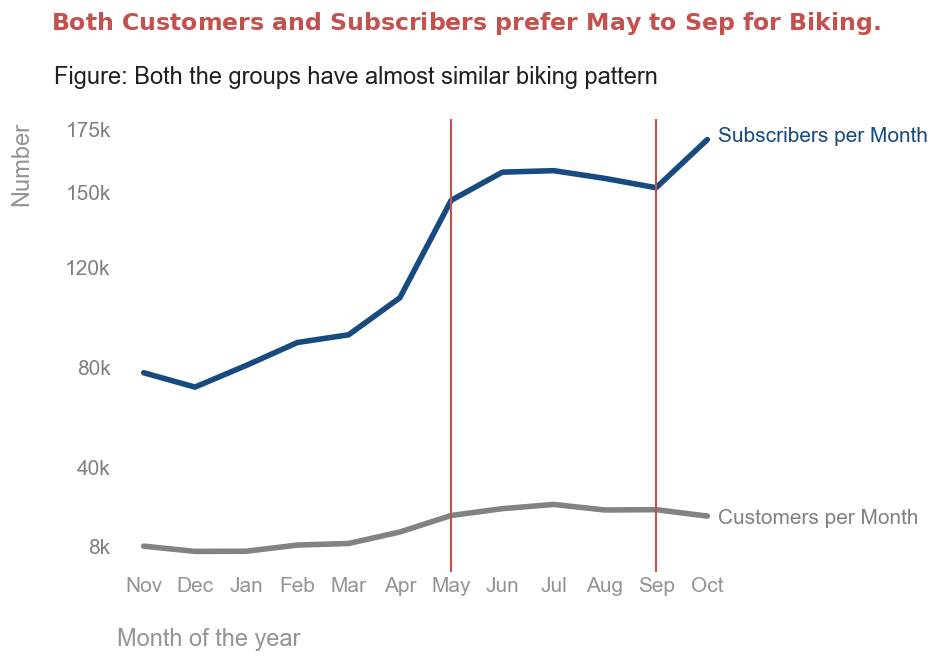

In [36]:
# create new figure
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=100) # width, height in inches
                             # resolution of the figure

#line plot with subscribers and customers per month 
plt.plot(range(12), user_type_duration['subscriber_no'], linewidth=4, color=BLUE1)
plt.plot(range(12), user_type_duration['customer_no'], linewidth=4, color=GRAY6)


#Drawing vertical lines
plt.axvline(x=10, color=RED1)
plt.axvline(x=6, color=RED1)


#y tick labels
plt.yticks(np.arange(0, 175000, 10000.0),fontsize=15, color ='grey')
plt.yticks([8000, 40000, 80000, 120000, 150000, 175000], ['8k', '40k', '80k', '120k', '150k', '175k'])

# plot labels
plt.text(11.2,17e3, 'Customers per Month', fontsize='15', color=GRAY6)
plt.text(11.2,170e3, 'Subscribers per Month', fontsize='15', color=BLUE1)

# set properties for axes object
plt.setp(ax1, xticks=list(range(12)), xticklabels=user_type_duration['Month'])
plt.xticks(fontsize=15,color=GRAY7)
sns.despine(bottom=True, left=True)
plt.title('Figure: Both the groups have almost similar biking pattern\n',fontsize=17,loc="left", color=GRAY1, x=-0.10)
plt.xlabel("\nMonth of the year",fontsize=17, color=GRAY7,x=0.15)
plt.ylabel("Number\n",fontsize=17, color=GRAY7, y=0.9)


#Add note on the top    
plt.text(-1.8, 215e3,
         '$\\bf{Both\ Customers\ and\ Subscribers\ prefer\ May\ to\ Sep\ for\ Biking.}$'
         ,fontsize=17, color=RED1, linespacing=1.4)

#plt.text(-0.65, 205e3, '\nAn almost similar biking pattern is observed for both the groups.\n', fontsize=15, color=RED1, linespacing=1.4)
plt.show()


### Observations


**1.** No significant difference is observed in the biking pattern between the Customers and the Subscribers.


**2.** Both groups are higher in number from May to October and lower in number from November to March.


In [37]:
#percentage of journey per season
journey_per_season = df['season'].value_counts()/df['season'].value_counts().sum()*100
journey_per_season= journey_per_season.rename_axis('season').reset_index(name='percentage')
journey_per_season

,season,percentage
0,Summer,32.914758
1,Autumn,27.395534
2,Spring,23.711509
3,Winter,15.978200


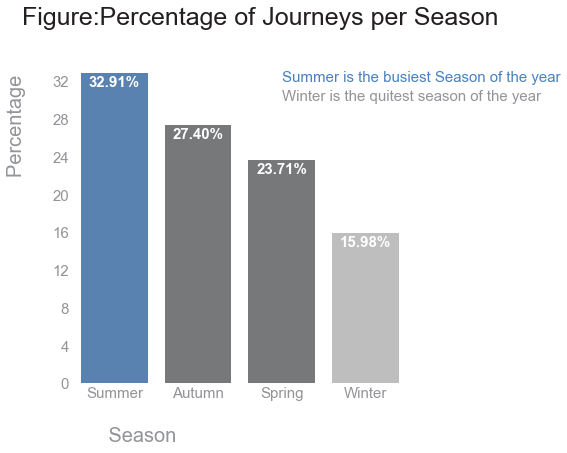

In [38]:
#delcation of colors
clrs = [BLUE2,GRAY5,GRAY5, GRAY9]

plt.figure(figsize = [6, 6])
ax = sns.barplot(x=journey_per_season['season'], y=journey_per_season['percentage'], palette=clrs)

# set properties for axes object
y_data = pd.Series(journey_per_season['percentage'])
x_labels = journey_per_season['season']
plt.yticks(np.arange(0, 36, 4.0), fontsize=15,color=GRAY7)
plt.xticks(fontsize=15,color=GRAY7)

plt.xlabel(" \n Season",fontsize=20,color=GRAY7, x=.20)
plt.ylabel("Percentage \n",fontsize=20,color=GRAY7, y=0.8)
plt.title('Figure:Percentage of Journeys per Season\n',fontsize=25,loc="left", color=GRAY1, x=-0.15)

#text comments
plt.text(2, 30,
         'Summer is the busiest Season of the year\n', 
         fontsize=15, color=BLUE2, linespacing=1.4)

plt.text(2, 28,
         'Winter is the quitest season of the year\n', 
         fontsize=15, color=GRAY7, linespacing=1.4)

# gets the value to annotate
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -17 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.2f}%".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=15, color= 'white',fontweight='bold')
    
#removing borders
sns.despine(bottom=True, left=True)
    

### Observations


**1.** The Summer season has the highest number of bikers and the Winter has the lowest with half of the bikers compared to the Summer period. 


**2.** As discussed earlier, the causal relationship with temperature requires the analysis of weather data which is not done here, hence, no causal relationship is established. 

## Ref:
    
[5].https://github.com/empathy87/storytelling-with-data
